In [72]:
from scipy.spatial import Voronoi, voronoi_plot_2d

from sklearn.manifold import TSNE

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams["figure.dpi"] = 150
import pandas as pd

from colour import Color

In [39]:
points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2],
                   [2, 0], [2, 1], [2, 2]])
vor = Voronoi(points)

In [41]:
print(vor.ridge_vertices)
#print(type(vor.ridge_vertices))
del vor.ridge_vertices[0]
#vor.ridge_points = np.delete(vor.ridge_points, 0)

[[-1, 0], [-1, 0], [-1, 1], [-1, 1], [0, 1], [-1, 3], [-1, 2], [2, 3], [-1, 3], [-1, 2], [1, 3], [0, 2]]


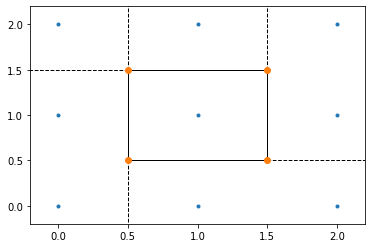

In [42]:
fig = voronoi_plot_2d(vor)
plt.show()

In [66]:
dataFrame = pd.read_csv("Location_20.csv")
print(dataFrame.head())
print(dataFrame.columns.values)

communities = np.genfromtxt("communities.csv", dtype=int)

   Unnamed: 0         dem AREASYMBOL  SPATIALVER MUSYM   MUKEY   mukey  \
0           1  223.316430         US           2  s952  661055  661055   
1           2  204.891052         US           2  s952  661055  661055   
2           3  206.676032         US           2  s952  661055  661055   
3           4  250.757306         US           2  s952  661055  661055   
4           5  255.773351         US           2  s952  661055  661055   

        clay       silt       sand  water_storage col_soil              x  \
0  22.841869  28.320967  48.844396       6.929184  #3A487D  640520.102322   
1  22.841869  28.320967  48.844396       6.929184  #3A487D  640494.579028   
2  22.841869  28.320967  48.844396       6.929184  #3A487D  640459.298270   
3  22.841869  28.320967  48.844396       6.929184  #3A487D  640588.814179   
4  22.841869  28.320967  48.844396       6.929184  #3A487D  640620.970447   

              y  optional  
0  3.971505e+06      True  
1  3.971467e+06      True  
2  3.971

In [50]:
# Get rid of some stuff
# del dataFrame["Unnamed: 0"]
# del dataFrame["AREASYMBOL"]
# del dataFrame["MUSYM"]
# del dataFrame["MUKEY"]
# del dataFrame["mukey"]
# del dataFrame["col_soil"]
# del dataFrame["optional"]


inputHeaders = ['dem', 'clay', 'silt', 'sand', 'water_storage', 'x', 'y']
allInput = np.zeros([len(dataFrame), len(inputHeaders)])

for i in range(len(inputHeaders)):
    allInput[:,i] = dataFrame[inputHeaders[i]]

In [51]:
print(allInput)

[[2.23316430e+02 2.28418687e+01 2.83209670e+01 ... 6.92918367e+00
  6.40520102e+05 3.97150534e+06]
 [2.04891052e+02 2.28418687e+01 2.83209670e+01 ... 6.92918367e+00
  6.40494579e+05 3.97146740e+06]
 [2.06676032e+02 2.28418687e+01 2.83209670e+01 ... 6.92918367e+00
  6.40459298e+05 3.97151765e+06]
 ...
 [2.52403075e+02 2.28418687e+01 2.83209670e+01 ... 6.92918367e+00
  6.43010383e+05 3.96984371e+06]
 [3.03843865e+01 2.28418687e+01 2.83209670e+01 ... 6.92918367e+00
  6.42985743e+05 3.96946016e+06]
 [3.89461213e+01 2.28418687e+01 2.83209670e+01 ... 6.92918367e+00
  6.43058988e+05 3.96942236e+06]]


In [53]:
tsneData = TSNE(n_components=2).fit_transform(allInput)

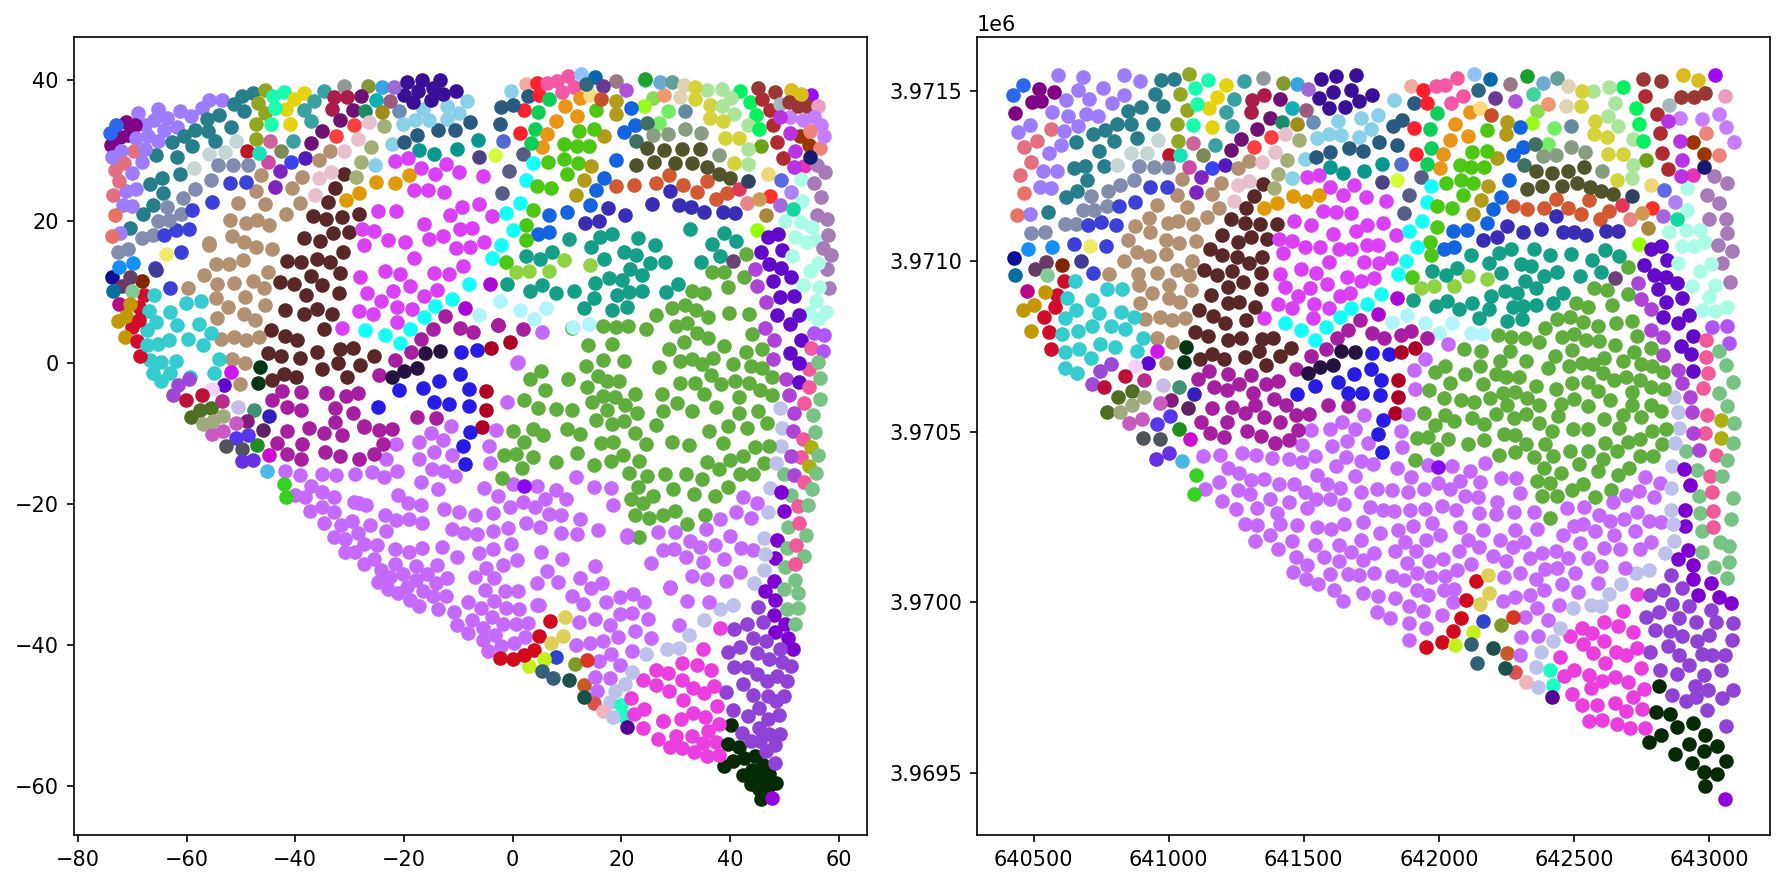

In [98]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

rotateAngle = -25 * np.pi/180

rotatedtSNEX = tsneData[:,0] * np.cos(rotateAngle) - tsneData[:,1] * np.sin(rotateAngle)
rotatedtSNEY = tsneData[:,0] * np.sin(rotateAngle) + tsneData[:,1] * np.cos(rotateAngle)

def rgb_to_hex(rgb):
    return '%02x%02x%02x' % rgb

colors = [f"#{rgb_to_hex(tuple(np.random.choice(range(256), size=3).flatten()))}" for i in range(max(communities))]

for i in range(len(rotatedtSNEX)):  
    ax[0].scatter(rotatedtSNEX[i], rotatedtSNEY[i], color=colors[communities[i]-1])
    ax[1].scatter(dataFrame["x"][i], dataFrame["y"][i], color=colors[communities[i]-1])

fig.tight_layout()
plt.show()

In [87]:
points = np.zeros([len(dataFrame["x"]), 2])
points[:,0] = dataFrame["x"]
points[:,1] = dataFrame["y"]

mapVor = Voronoi(points)

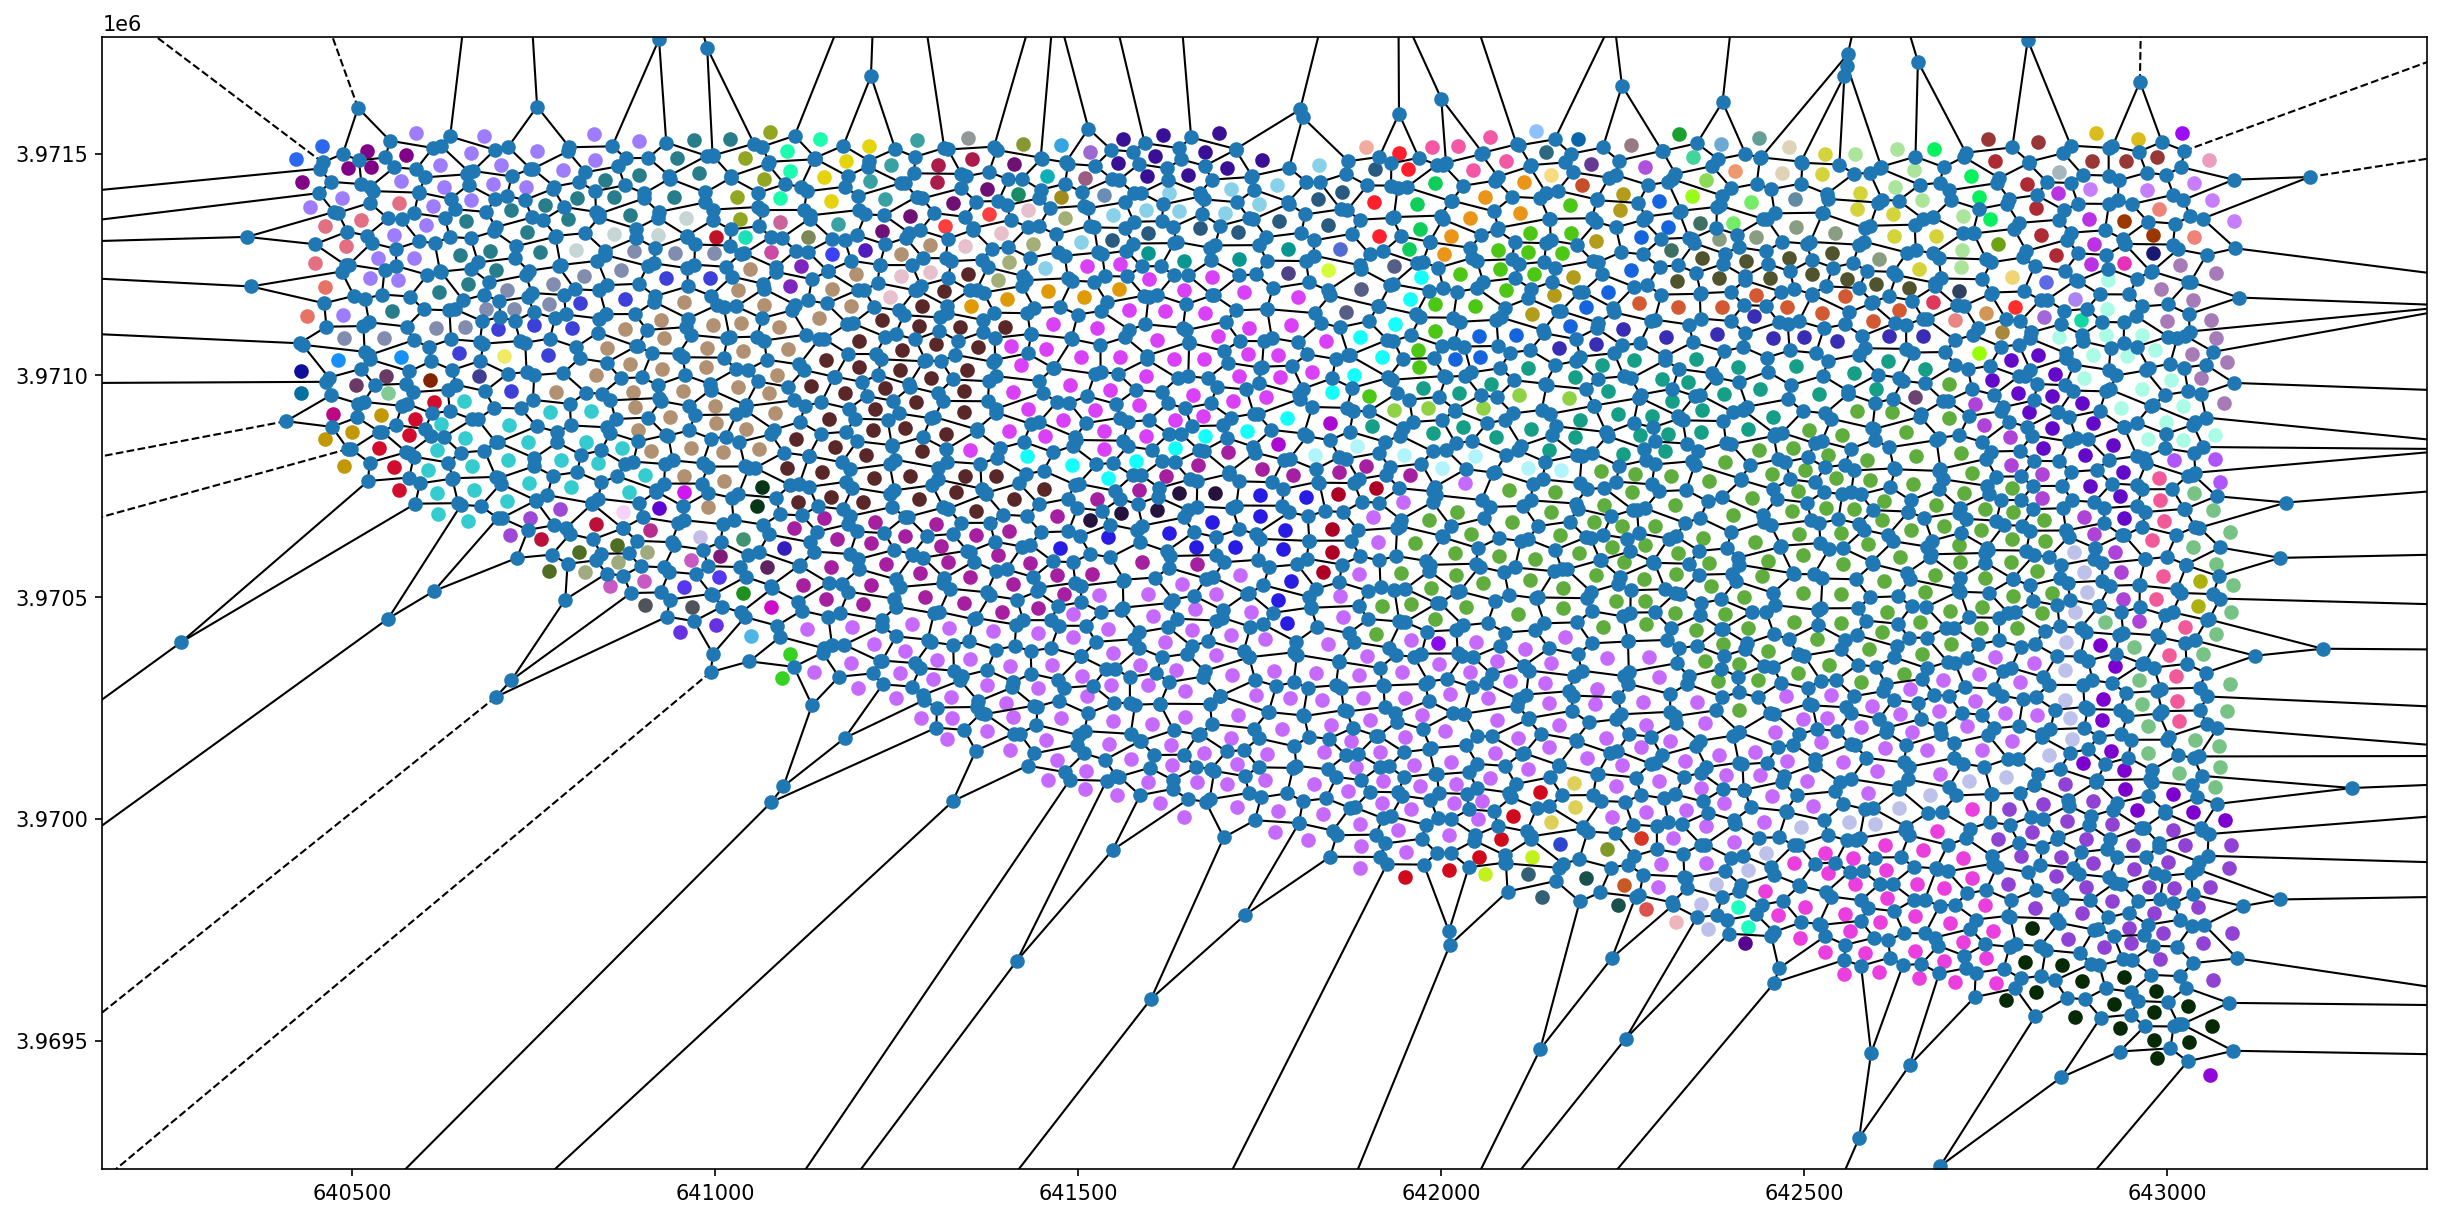

In [100]:
fig = voronoi_plot_2d(mapVor, show_points=False, show_verticies=False, point_size=.001, line_width=1)
fig.set_size_inches(20, 10)

for i in range(len(points)):  
    plt.scatter(points[i,0], points[i,1], color=colors[communities[i]-1])
    
plt.show()